In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
train1DataFilename = 'spamTrain1.csv'
train2DataFilename = 'spamTrain2.csv'

data1 = np.loadtxt(train1DataFilename,delimiter=',')
data2 = np.loadtxt(train2DataFilename,delimiter=',')

data = np.r_[data1,data2]
X = data[:, :-1]
y = data[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [3]:
import xgboost as xgb


model = xgb.XGBClassifier(n_estimators=140, eval_metric='logloss', random_state=1)

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(model, 
           k_features='best',  # You can also specify the number of features to select
           forward=False,  # Forward selection
           floating=False,  # Set to True for floating selection
           scoring='roc_auc',  # Scoring metric
           )  # Cross-validation folds

sfs.fit(X_train, y_train)

c:\Users\bdsoc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\bdsoc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\bdsoc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\bdsoc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\bdsoc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is depreca

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric='logloss',
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=140, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=1, ...),
                          forward=False, k_features=(1, 30), scoring='roc_auc')

In [9]:
selected_feature_indices = sfs.k_feature_idx_  # Indices of selected features

X_train_sfs = X_train[:, selected_feature_indices]  # Training set with selected features
X_test_sfs = X_test[:, selected_feature_indices]    # Test set with selected features

print("Selected Feature Indices:", selected_feature_indices)
print("Selected Features Shape:", X_train_sfs.shape)

Selected Feature Indices: (0, 3, 4, 6, 7, 8, 9, 10, 11, 19, 22, 26, 28, 29)
Selected Features Shape: (1500, 14)


In [10]:
from sklearn.metrics import accuracy_score


model.fit(X_train_sfs, y_train)
y_pred = model.predict(X_test_sfs)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8226666666666667


In [7]:
class knn():
    def __str__(self):
        return f"knn_{self.k}"
    
    def __init__(self, k):
        self.k = k

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        
        testFeatures = X_test[:, selected_feature_indices] 
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

knn_100 | AUC: 0.8811768328538224 | TPR at FPR = 0.01: 0.2981574539363484


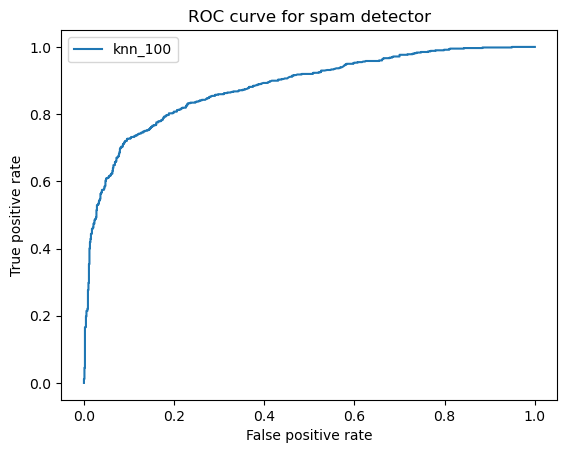

In [8]:
from evaluateClassifier import evalModel

evalModel([knn(100)])